In [5]:
import gensim

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer



In [2]:
import tensorflow as tf

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [4]:
import missingno as msno


In [58]:
df = pd.read_csv('flipkart.csv')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [29]:
df

uniq_id            crawl_timestamp   
0     55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000  \
1     7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2     64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3     d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4     6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   
...                                ...                        ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc  2015-12-01 10:15:43 +0000   
1046  fd6cbcc22efb6b761bd564c28928483c  2015-12-01 10:15:43 +0000   
1047  5912e037d12774bb73a2048f35a00009  2015-12-01 10:15:43 +0000   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6  2015-12-01 10:15:43 +0000   
1049  f2f027ad6a6df617c9f125173da71e44  2015-12-01 10:15:43 +0000   

                                            product_url   
0     http://www.flipkart.com/elegance-polyester-mul...  \
1     http://www.flipkart.com/sathiyas-cotton-bath-t...   
2     http://www.flipkart.com/eurospa-cotton-terry-f...   
3     http://www.flipkart.com/santosh-royal-fashion-...   
4     http://www.flipkart.com/jaipur-print-cotton-fl...   
...                                                 ...   
1045  http://www.flipkart.com/oren-empower-extra-lar...   
1046  http://www.flipkart.com/wallmantra-large-vinyl...   
1047  http://www.flipkart.com/uberlyfe-extra-large-p...   
1048  http://www.flipkart.com/wallmantra-medium-viny...   
1049  http://www.flipkart.com/uberlyfe-large-vinyl-s...   

                                           product_name   
0     Elegance Polyester Multicolor Abstract Eyelet ...  \
1                            Sathiyas Cotton Bath Towel   
2                   Eurospa Cotton Terry Face Towel Set   
3     SANTOSH ROYAL FASHION Cotton Printed King size...   
4     Jaipur Print Cotton Floral King sized Double B...   
...                                                 ...   
1045     Oren Empower Extra Large Self Adhesive Sticker   
1046             Wallmantra Large Vinyl Sticker Sticker   
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films...   
1048            Wallmantra Medium Vinyl Sticker Sticker   
1049                       Uberlyfe Large Vinyl Sticker   

                                  product_category_tree               pid   
0     ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z  \
1     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   
...                                                 ...               ...   
1045  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE88ZGTX65GH4V   
1046  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZD5GDCVQ   
1047  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE5UVGW2JWVWCT   
1048  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZGFD3RCE   
1049  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE2ZEPACRQJKH7   

      retail_price  discounted_price                                 image   
0           1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg  \
1            600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2              NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3           2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4           2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   
...            ...               ...                                   ...   
1045        1399.0             999.0  958f54f4c46b53c8a0a9b8167d9140bc.jpg   
1046        4930.0            1896.0  fd6cbcc22efb6b761bd564c28928483c.jpg   
1047        4500.0            1449.0  5912e037d12774bb73a2048f35a00009.jpg   
1048        3465.0            1333.0  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg   
1

In [5]:
df.describe()

retail_price  discounted_price
count    1049.000000       1049.000000
mean     2186.197331       1584.527169
std      7639.229411       7475.099680
min        35.000000         35.000000
25%       555.000000        340.000000
50%       999.000000        600.000000
75%      1999.000000       1199.000000
max    201000.000000     201000.000000

<Axes: >

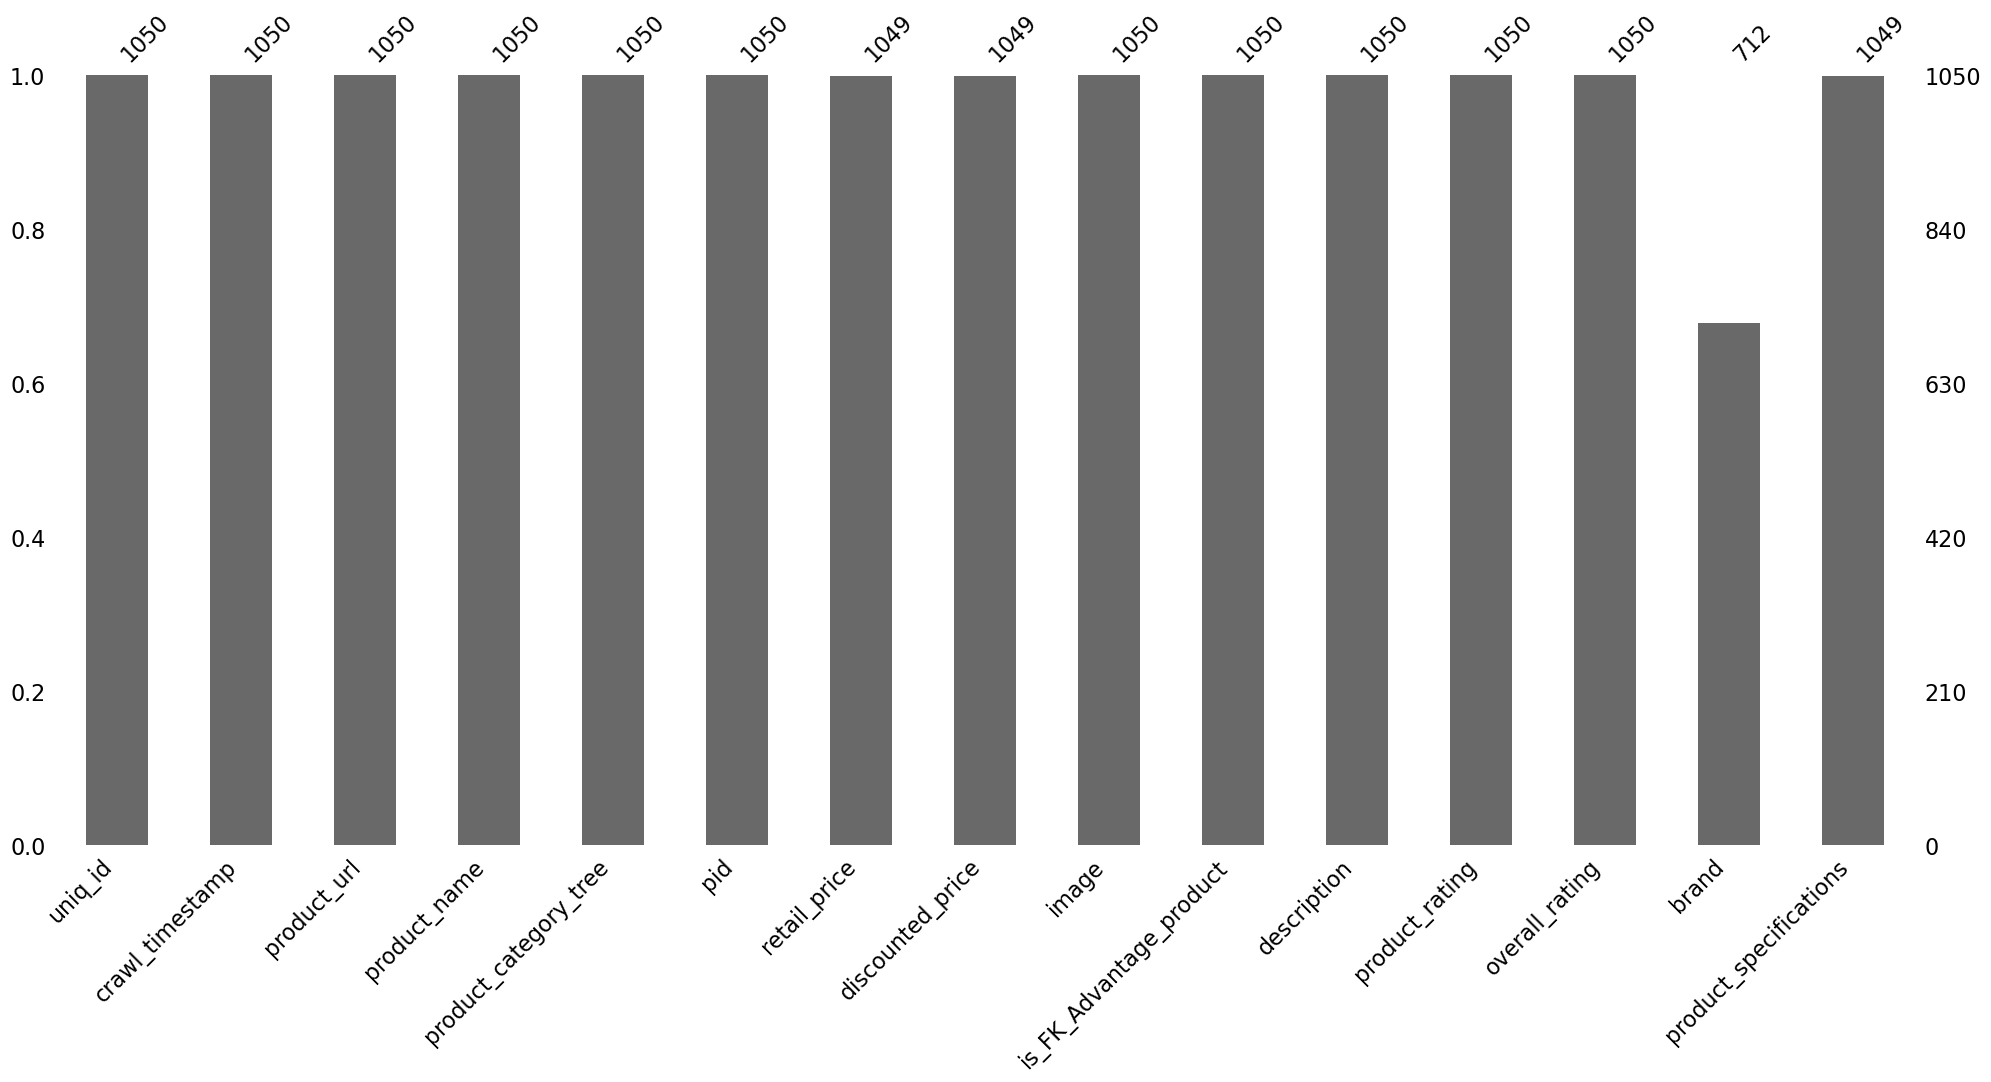

In [6]:
msno.bar(df)

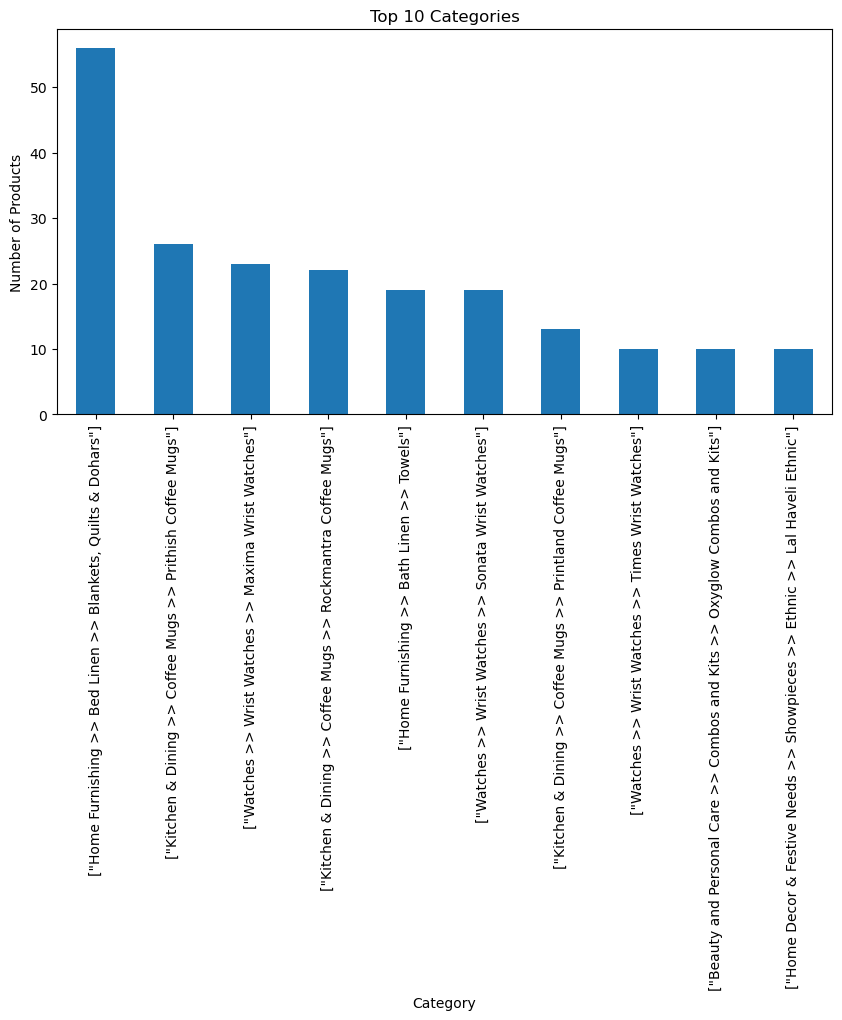

In [7]:
df['product_category_tree'].value_counts().head(10).plot(kind='bar', figsize=(10,5))
plt.title('Top 10 Categories')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.show()


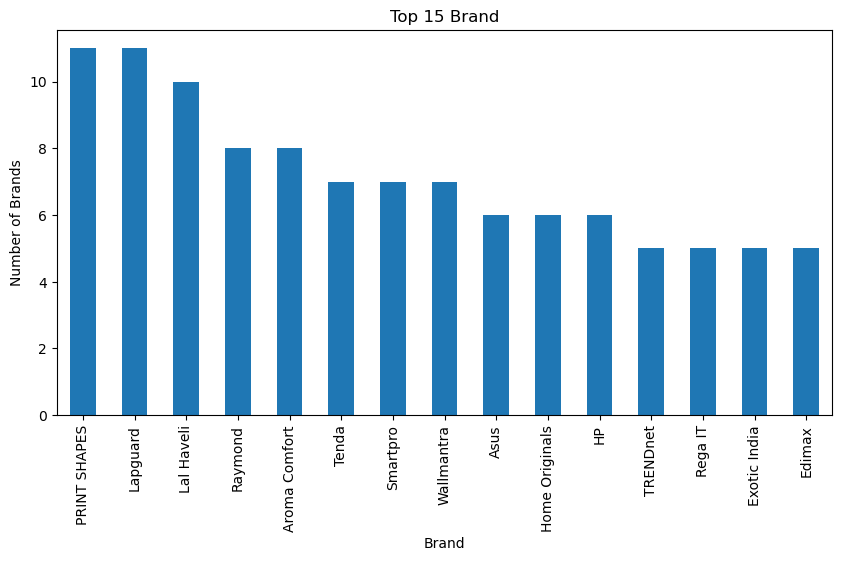

In [9]:
df['brand'].value_counts().head(15).plot(kind='bar', figsize=(10,5))
plt.title('Top 15 Brand')
plt.xlabel('Brand')
plt.ylabel('Number of Brands')
plt.show()


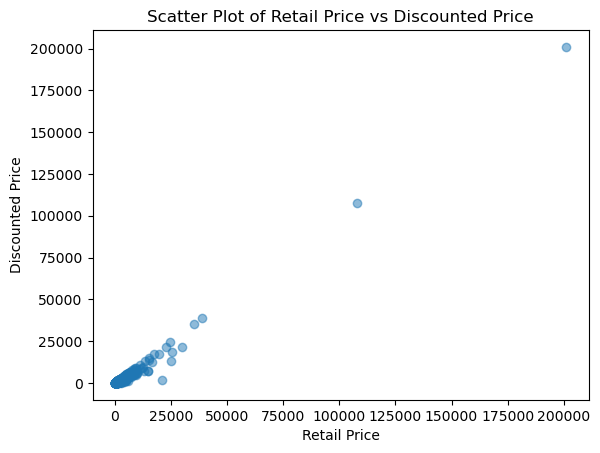

In [9]:

plt.scatter(df['retail_price'], df['discounted_price'], alpha=0.5)
plt.xlabel('Retail Price')
plt.ylabel('Discounted Price')
plt.title('Scatter Plot of Retail Price vs Discounted Price')
plt.show()



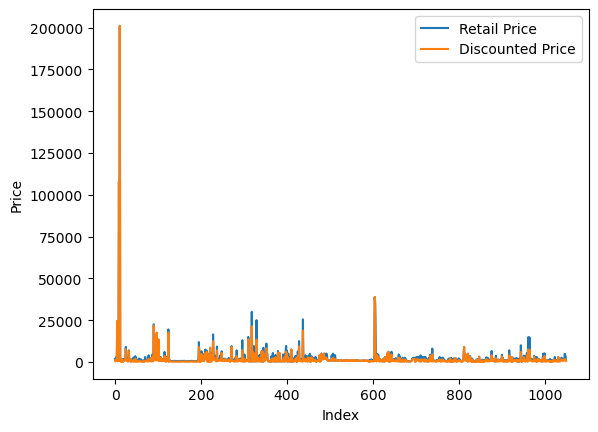

In [10]:
plt.plot(df['retail_price'], label='Retail Price')
plt.plot(df['discounted_price'], label='Discounted Price')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.show()

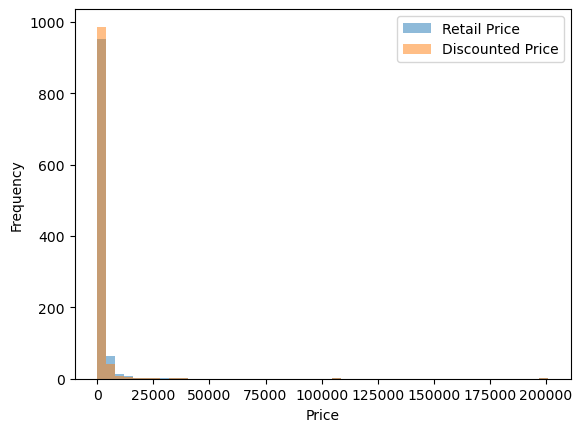

In [11]:
plt.hist(df['retail_price'], bins=50, alpha=0.5, label='Retail Price')
plt.hist(df['discounted_price'], bins=50, alpha=0.5, label='Discounted Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [12]:
df

uniq_id            crawl_timestamp  \
0     55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1     7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2     64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3     d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4     6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   
...                                ...                        ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc  2015-12-01 10:15:43 +0000   
1046  fd6cbcc22efb6b761bd564c28928483c  2015-12-01 10:15:43 +0000   
1047  5912e037d12774bb73a2048f35a00009  2015-12-01 10:15:43 +0000   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6  2015-12-01 10:15:43 +0000   
1049  f2f027ad6a6df617c9f125173da71e44  2015-12-01 10:15:43 +0000   

                                            product_url  \
0     http://www.flipkart.com/elegance-polyester-mul...   
1     http://www.flipkart.com/sathiyas-cotton-bath-t...   
2     http://www.flipkart.com/eurospa-cotton-terry-f...   
3     http://www.flipkart.com/santosh-royal-fashion-...   
4     http://www.flipkart.com/jaipur-print-cotton-fl...   
...                                                 ...   
1045  http://www.flipkart.com/oren-empower-extra-lar...   
1046  http://www.flipkart.com/wallmantra-large-vinyl...   
1047  http://www.flipkart.com/uberlyfe-extra-large-p...   
1048  http://www.flipkart.com/wallmantra-medium-viny...   
1049  http://www.flipkart.com/uberlyfe-large-vinyl-s...   

                                           product_name  \
0     Elegance Polyester Multicolor Abstract Eyelet ...   
1                            Sathiyas Cotton Bath Towel   
2                   Eurospa Cotton Terry Face Towel Set   
3     SANTOSH ROYAL FASHION Cotton Printed King size...   
4     Jaipur Print Cotton Floral King sized Double B...   
...                                                 ...   
1045     Oren Empower Extra Large Self Adhesive Sticker   
1046             Wallmantra Large Vinyl Sticker Sticker   
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films...   
1048            Wallmantra Medium Vinyl Sticker Sticker   
1049                       Uberlyfe Large Vinyl Sticker   

                                  product_category_tree               pid  \
0     ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   
...                                                 ...               ...   
1045  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE88ZGTX65GH4V   
1046  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZD5GDCVQ   
1047  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE5UVGW2JWVWCT   
1048  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZGFD3RCE   
1049  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE2ZEPACRQJKH7   

      retail_price  discounted_price                                 image  \
0           1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1            600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2              NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3           2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4           2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   
...            ...               ...                                   ...   
1045        1399.0             999.0  958f54f4c46b53c8a0a9b8167d9140bc.jpg   
1046        4930.0            1896.0  fd6cbcc22efb6b761bd564c28928483c.jpg   
1047        4500.0            1449.0  5912e037d12774bb73a2048f35a00009.jpg   
1048        3465.0            1333.0  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg   
1

In [6]:


# Fonction de prétraitement
def preprocess(text):
    # Conversion en minuscules
    text = text.lower()
    # Suppression de la ponctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenisation
    words = word_tokenize(text)
    # Suppression des stopwords
    words = [w for w in words if w not in stopwords.words('english')]
    # Stemmatisation
    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w in words]
    # Reconstruction du texte
    text = ' '.join(words)
    return text

# Application de la fonction de prétraitement à la colonne "description"
df[['description_processing','product_name_processing']] = df[['description','product_name']].applymap(preprocess)


In [7]:
df_bert =  df.copy()

In [8]:
# Fonction de prétraitement
def preprocessBert(text):
    # Conversion en minuscules
    text = text.lower()
    # Suppression de la ponctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenisation
    words = word_tokenize(text)
    # Suppression des stopwords
    #words = [w for w in words if w not in stopwords.words('english')]
    # Stemmatisation
    #stemmer = PorterStemmer()
    #words = [stemmer.stem(w) for w in words]
    # Reconstruction du texte
    text = ' '.join(words)
    return text

# Application de la fonction de prétraitement à la colonne "description"
df_bert[['description_processing','product_name_processing']] = df[['description','product_name']].applymap(preprocess)

In [39]:
df_bert[['description_processing','product_name_processing']]

description_processing   
0     key featur eleg polyest multicolor abstract ey...  \
1     specif sathiya cotton bath towel 3 bath towel ...   
2     key featur eurospa cotton terri face towel set...   
3     key featur santosh royal fashion cotton print ...   
4     key featur jaipur print cotton floral king siz...   
...                                                 ...   
1045  oren empow extra larg self adhes sticker pack ...   
1046  wallmantra larg vinyl sticker sticker pack 1 p...   
1047  buy uberlyf extra larg pigment polyvinyl film ...   
1048  buy wallmantra medium vinyl sticker sticker rs...   
1049  buy uberlyf larg vinyl sticker rs595 onlin ube...   

                                product_name_processing  
0     eleg polyest multicolor abstract eyelet door c...  
1                             sathiya cotton bath towel  
2                   eurospa cotton terri face towel set  
3     santosh royal fashion cotton print king size d...  
4     jaipur print cotton floral king size doubl bed...  
...                                                 ...  
1045           oren empow extra larg self adhes sticker  
1046              wallmantra larg vinyl sticker sticker  
1047  uberlyf extra larg pigment polyvinyl film impo...  
1048            wallmantra medium vinyl sticker sticker  
1049                         uberlyf larg vinyl sticker  

[1050 rows x 2 columns]

In [9]:
df[['description', 'description_processing','product_name_processing','product_name']].head(10)

description   
0  Key Features of Elegance Polyester Multicolor ...  \
1  Specifications of Sathiyas Cotton Bath Towel (...   
2  Key Features of Eurospa Cotton Terry Face Towe...   
3  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4  Key Features of Jaipur Print Cotton Floral Kin...   
5  Maserati Time R8851116001 Analog Watch  - For ...   
6  Camerii WM64 Elegance Analog Watch  - For Men,...   
7  T STAR UFT-TSW-005-BK-BR Analog Watch  - For B...   
8  Alfajr WY16B Youth Digital Watch  - For Men, B...   
9  TAG Heuer CAU1116.BA0858 Formula 1 Analog Watc...   

                              description_processing   
0  key featur eleg polyest multicolor abstract ey...  \
1  specif sathiya cotton bath towel 3 bath towel ...   
2  key featur eurospa cotton terri face towel set...   
3  key featur santosh royal fashion cotton print ...   
4  key featur jaipur print cotton floral king siz...   
5  maserati time r8851116001 analog watch boy buy...   
6  camerii wm64 eleg analog watch men boy buy cam...   
7  star ufttsw005bkbr analog watch boy price rs 3...   
8  alfajr wy16b youth digit watch men boy buy alf...   
9  tag heuer cau1116ba0858 formula 1 analog watch...   

                             product_name_processing   
0  eleg polyest multicolor abstract eyelet door c...  \
1                          sathiya cotton bath towel   
2                eurospa cotton terri face towel set   
3  santosh royal fashion cotton print king size d...   
4  jaipur print cotton floral king size doubl bed...   
5         maserati time r8851116001 analog watch boy   
6             camerii wm64 eleg analog watch men boy   
7                star ufttsw005bkbr analog watch boy   
8             alfajr wy16b youth digit watch men boy   
9  tag heuer cau1116ba0858 formula 1 analog watch...   

                                        product_name  
0  Elegance Polyester Multicolor Abstract Eyelet ...  
1                         Sathiyas Cotton Bath Towel  
2                Eurospa Cotton Terry Face Towel Set  
3  SANTOSH ROYAL FASHION Cotton Printed King size...  
4  Jaipur Print Cotton Floral King sized Double B...  
5  Maserati Time R8851116001 Analog Watch  - For ...  
6  Camerii WM64 Elegance Analog Watch  - For Men,...  
7  T STAR UFT-TSW-005-BK-BR Analog Watch  - For Boys  
8  Alfajr WY16B Youth Digital Watch  - For Men, Boys  
9  TAG Heuer CAU1116.BA0858 Formula 1 Analog Watc...

In [35]:
df

uniq_id            crawl_timestamp   
0     55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000  \
1     7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2     64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3     d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4     6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   
...                                ...                        ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc  2015-12-01 10:15:43 +0000   
1046  fd6cbcc22efb6b761bd564c28928483c  2015-12-01 10:15:43 +0000   
1047  5912e037d12774bb73a2048f35a00009  2015-12-01 10:15:43 +0000   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6  2015-12-01 10:15:43 +0000   
1049  f2f027ad6a6df617c9f125173da71e44  2015-12-01 10:15:43 +0000   

                                            product_url   
0     http://www.flipkart.com/elegance-polyester-mul...  \
1     http://www.flipkart.com/sathiyas-cotton-bath-t...   
2     http://www.flipkart.com/eurospa-cotton-terry-f...   
3     http://www.flipkart.com/santosh-royal-fashion-...   
4     http://www.flipkart.com/jaipur-print-cotton-fl...   
...                                                 ...   
1045  http://www.flipkart.com/oren-empower-extra-lar...   
1046  http://www.flipkart.com/wallmantra-large-vinyl...   
1047  http://www.flipkart.com/uberlyfe-extra-large-p...   
1048  http://www.flipkart.com/wallmantra-medium-viny...   
1049  http://www.flipkart.com/uberlyfe-large-vinyl-s...   

                                           product_name   
0     Elegance Polyester Multicolor Abstract Eyelet ...  \
1                            Sathiyas Cotton Bath Towel   
2                   Eurospa Cotton Terry Face Towel Set   
3     SANTOSH ROYAL FASHION Cotton Printed King size...   
4     Jaipur Print Cotton Floral King sized Double B...   
...                                                 ...   
1045     Oren Empower Extra Large Self Adhesive Sticker   
1046             Wallmantra Large Vinyl Sticker Sticker   
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films...   
1048            Wallmantra Medium Vinyl Sticker Sticker   
1049                       Uberlyfe Large Vinyl Sticker   

                                  product_category_tree               pid   
0     ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z  \
1     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   
...                                                 ...               ...   
1045  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE88ZGTX65GH4V   
1046  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZD5GDCVQ   
1047  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE5UVGW2JWVWCT   
1048  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZGFD3RCE   
1049  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE2ZEPACRQJKH7   

      retail_price  discounted_price                                 image   
0           1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg  \
1            600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2              NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3           2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4           2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   
...            ...               ...                                   ...   
1045        1399.0             999.0  958f54f4c46b53c8a0a9b8167d9140bc.jpg   
1046        4930.0            1896.0  fd6cbcc22efb6b761bd564c28928483c.jpg   
1047        4500.0            1449.0  5912e037d12774bb73a2048f35a00009.jpg   
1048        3465.0            1333.0  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg   
1

In [10]:
nltk.download('punkt')
from nltk import FreqDist


# Définition des paramètres de TfidfVectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5)

# Combinaison des colonnes "description_processing" et "product_name_processing"
corpus = (df['description_processing'] + ' ' + df['product_name_processing']).values.astype('U')

# Tokenisation du corpus
corpus_tokenized = [word_tokenize(text) for text in corpus]


# Transformation du corpus tokenisé en vecteurs tf-idf
X = vectorizer.fit_transform([' '.join(tokens) for tokens in corpus_tokenized])
#vect_name = vectorizer.get_feature_names_out()



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sylvain\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


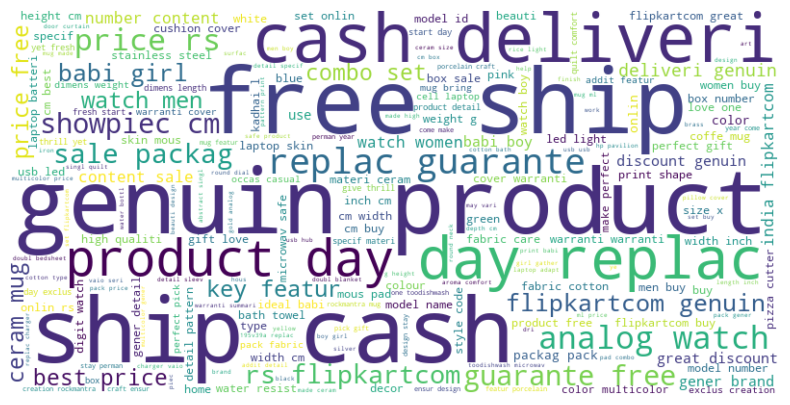

In [11]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(' '.join(corpus))
# Affichage du wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [12]:
import nltk
from nltk import FreqDist

# Tokenisation du corpus
corpus_tokenized = [nltk.word_tokenize(text) for text in corpus]

# Calcul de la fréquence des tokens
token_freq = FreqDist([token for tokens in corpus_tokenized for token in tokens])


In [13]:
most_common_tokens = token_freq.most_common(20)
for token, freq in most_common_tokens:
    print(token, freq)


product 869
cm 648
free 616
rs 595
buy 582
replac 579
ship 570
deliveri 567
genuin 564
cash 564
price 557
day 555
mug 525
watch 511
30 495
guarante 473
flipkartcom 472
set 447
1 433
design 416


In [13]:
print(len(corpus_tokenized))

1050


In [16]:
corpus_tokenized

[['key',
  'featur',
  'eleg',
  'polyest',
  'multicolor',
  'abstract',
  'eyelet',
  'door',
  'curtain',
  'floral',
  'curtaineleg',
  'polyest',
  'multicolor',
  'abstract',
  'eyelet',
  'door',
  'curtain',
  '213',
  'cm',
  'height',
  'pack',
  '2',
  'price',
  'rs',
  '899',
  'curtain',
  'enhanc',
  'look',
  'interiorsthi',
  'curtain',
  'made',
  '100',
  'high',
  'qualiti',
  'polyest',
  'fabricit',
  'featur',
  'eyelet',
  'style',
  'stitch',
  'metal',
  'ringit',
  'make',
  'room',
  'environ',
  'romant',
  'lovingthi',
  'curtain',
  'ant',
  'wrinkl',
  'anti',
  'shrinkag',
  'eleg',
  'apparanceg',
  'home',
  'bright',
  'modernist',
  'appeal',
  'design',
  'surreal',
  'attent',
  'sure',
  'steal',
  'heart',
  'contemporari',
  'eyelet',
  'valanc',
  'curtain',
  'slide',
  'smoothli',
  'draw',
  'apart',
  'first',
  'thing',
  'morn',
  'welcom',
  'bright',
  'sun',
  'ray',
  'want',
  'wish',
  'good',
  'morn',
  'whole',
  'world',
  'dra

In [17]:
# Affichage des dimensions de la matrice
print(X.shape) # vérifier que la taille de la matrice a bien changé

(1050, 1011)


In [14]:
x_Tfid = X.toarray()


In [15]:
(df['description_processing'] + " " + df['product_name_processing']).iloc[0]

'key featur eleg polyest multicolor abstract eyelet door curtain floral curtaineleg polyest multicolor abstract eyelet door curtain 213 cm height pack 2 price rs 899 curtain enhanc look interiorsthi curtain made 100 high qualiti polyest fabricit featur eyelet style stitch metal ringit make room environ romant lovingthi curtain ant wrinkl anti shrinkag eleg apparanceg home bright modernist appeal design surreal attent sure steal heart contemporari eyelet valanc curtain slide smoothli draw apart first thing morn welcom bright sun ray want wish good morn whole world draw close even creat special moment joyou beauti given sooth print bring home eleg curtain softli filter light room get right amount sunlightspecif eleg polyest multicolor abstract eyelet door curtain 213 cm height pack 2 gener brand eleg design door type eyelet model name abstract polyest door curtain set 2 model id duster25 color multicolor dimens length 213 cm box number content sale packag pack 2 sale packag 2 curtain bod

In [16]:

# Réduction de dimension avec une ACP
pca = PCA()
X_pca = pca.fit_transform(x_Tfid)

# Réduction de dimension avec t-SNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_pca)



In [17]:
from sklearn.cluster import KMeans

for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=1, n_init='auto').fit(X_tsne)

    print("Nombre de clusters : {} ; Inertie : {:.2f}".format(n_clusters, kmeans.inertia_))

Nombre de clusters : 1 ; Inertie : 1131881.75
Nombre de clusters : 2 ; Inertie : 664193.75
Nombre de clusters : 3 ; Inertie : 418019.75
Nombre de clusters : 4 ; Inertie : 270719.25
Nombre de clusters : 5 ; Inertie : 205965.16
Nombre de clusters : 6 ; Inertie : 165315.44
Nombre de clusters : 7 ; Inertie : 118298.24
Nombre de clusters : 8 ; Inertie : 102344.95
Nombre de clusters : 9 ; Inertie : 85283.75
Nombre de clusters : 10 ; Inertie : 71998.45


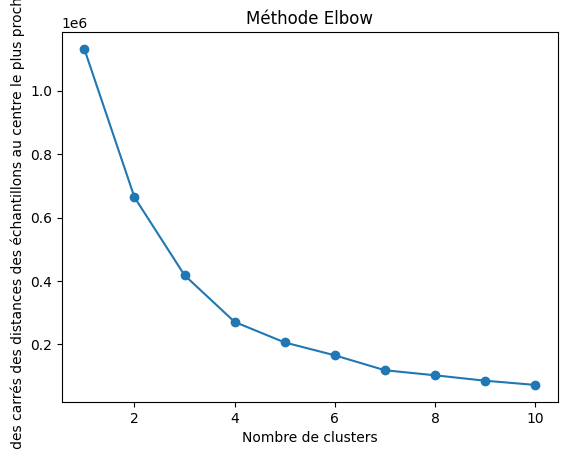

In [18]:
inertias = []

for n_clusters in range(1, 11):
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=1, n_init='auto').fit(X_tsne)

    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.title('Méthode Elbow')
plt.xlabel('Nombre de clusters')
plt.ylabel("Somme des carrés des distances des échantillons au centre le plus proche (inertie)")
plt.show()


In [19]:
from sklearn.metrics import silhouette_score
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=1, n_init='auto').fit(X_tsne)
    labels = kmeans.labels_
    score = silhouette_score(X_tsne, labels)
    print(f"Silhouette score for {n_clusters} clusters: {score}")

Silhouette score for 2 clusters: 0.3672234117984772
Silhouette score for 3 clusters: 0.4077106714248657
Silhouette score for 4 clusters: 0.45260176062583923
Silhouette score for 5 clusters: 0.45347949862480164
Silhouette score for 6 clusters: 0.46270307898521423
Silhouette score for 7 clusters: 0.5030229091644287
Silhouette score for 8 clusters: 0.5066637396812439
Silhouette score for 9 clusters: 0.5143181681632996
Silhouette score for 10 clusters: 0.5049259662628174


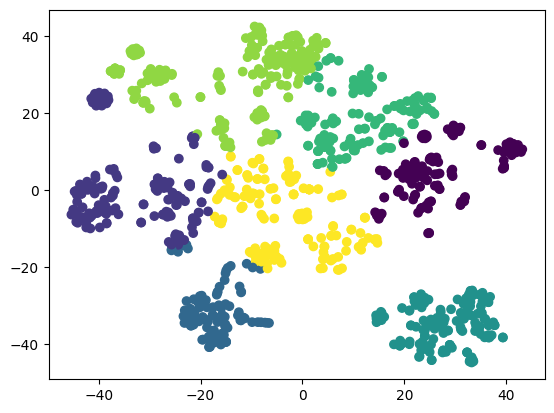

In [20]:
# Clustering avec k-means
kmeans = KMeans(n_clusters=7, random_state=0,n_init='auto').fit(X_tsne)


# Affichage des clusters
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=kmeans.labels_)
plt.show()


In [68]:
# Création d'une nouvelle colonne "product_category" dans le DataFrame
df['product_category'] = df['product_category_tree'].apply(lambda x: x.split('>>')[0].strip())

# Affichage des 7 catégories différentes
df['product_category'].unique()


array(['["Home Furnishing', '["Baby Care', '["Watches',
       '["Home Decor & Festive Needs', '["Kitchen & Dining',
       '["Beauty and Personal Care', '["Computers'], dtype=object)

In [69]:
df['product_category'] = df['product_category'].str.replace(r'\[', '', regex=True).str.replace('"', '', regex=True)


In [70]:
df['product_category']

0       Home Furnishing
1             Baby Care
2             Baby Care
3       Home Furnishing
4       Home Furnishing
             ...       
1045          Baby Care
1046          Baby Care
1047          Baby Care
1048          Baby Care
1049          Baby Care
Name: product_category, Length: 1050, dtype: object

In [71]:
df['product_category'].value_counts()

product_category
Home Furnishing               150
Baby Care                     150
Watches                       150
Home Decor & Festive Needs    150
Kitchen & Dining              150
Beauty and Personal Care      150
Computers                     150
Name: count, dtype: int64

In [25]:
#utiliser product category three
from sklearn.metrics import adjusted_rand_score

# On suppose que "y_true" est un vecteur contenant les labels réels et "y_pred" les labels prédits par votre modèle de clustering KMeans
y_true = df['product_category'].values
y_pred = kmeans.labels_

# Calcul de l'ARI
ari = adjusted_rand_score(y_true, y_pred)

# Affichage de l'ARI
print("ARI:", ari)



ARI: 0.4396155514198578


## Word2Vec

In [26]:
import time
from sklearn import manifold, decomposition
from sklearn import cluster, metrics

# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégorie et n° de clusters
def ARI_fct(features) :
    time1 = time.time()
    
    tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, 
                                 init='random', learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(features)
    
    # Détermination des clusters à partir des données après Tsne 
    cls = cluster.KMeans(n_clusters=7, n_init=100, random_state=42)
    cls.fit(X_tsne)
    y_true = df['product_category'].values
    y_pred = kmeans.labels_

    # Calcul de l'ARI
    ari = adjusted_rand_score(y_true, y_pred)
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ari, "time : ", time2)
    
    return ari, X_tsne, cls.labels_

In [27]:
# visualisation du Tsne selon les vraies catégories et selon les clusters
def TSNE_visu_fct(X_tsne, labels, ari) :
    fig = plt.figure(figsize=(15,6))
    
    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=labels, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(labels), loc="best", title="Clusters")
    plt.title('Représentation des tweets par clusters')
    
    plt.show()
    print("ARI : ", ari)

In [28]:

import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model


In [29]:
w2v_size=300
w2v_window=5
w2v_min_count=1
w2v_epochs=100
maxlen = 24 # adapt to length of sentences

In [30]:
from gensim.models import Word2Vec
print("Build & train Word2Vec model ...")

# Entraîner le modèle Word2Vec
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window,
                                                vector_size=w2v_size,
                                                seed=42,
                                                workers=1)

w2v_model.build_vocab(corpus_tokenized)
w2v_model.train(corpus_tokenized,total_examples=w2v_model.corpus_count, epochs=100)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

Build & train Word2Vec model ...
Vocabulary size: 5593
Word2Vec trained


In [31]:
print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus_tokenized)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(corpus_tokenized),
                                                     maxlen=maxlen,
                                                     padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Fit Tokenizer ...
Number of unique words: 5594


In [32]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix ...
Word embedding rate :  1.0
Embedding matrix: (5594, 300)


In [33]:
# Création du modèle

input=Input(shape=(len(x_sentences),maxlen),dtype='float64')
word_input=Input(shape=(maxlen,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 24)]              0         
                                                                 
 embedding (Embedding)       (None, 24, 300)           1678200   
                                                                 
 global_average_pooling1d (G  (None, 300)              0         
 lobalAveragePooling1D)                                          
                                                                 
Total params: 1,678,200
Trainable params: 1,678,200
Non-trainable params: 0
_________________________________________________________________


In [34]:
embeddings = embed_model.predict(x_sentences)
embeddings.shape

33/33 [==============================] - 0s 1ms/step


(1050, 300)

In [35]:
ari, X_tsne, labels = ARI_fct(embeddings)

ARI :  0.4396155514198578 time :  11.0


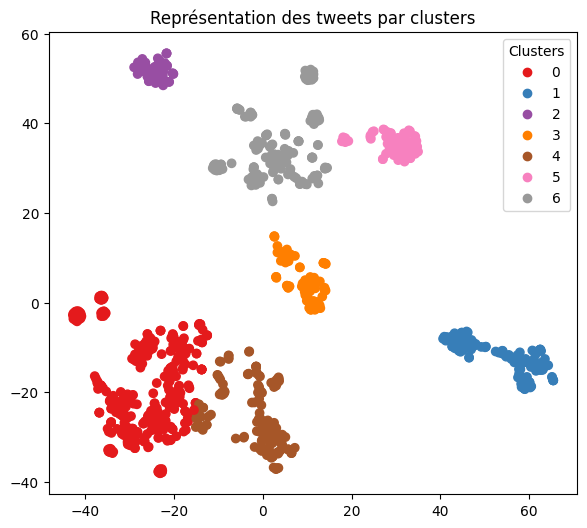

ARI :  0.4396155514198578


In [36]:
TSNE_visu_fct(X_tsne, labels, ari)

In [50]:
import tensorflow as tf
import tensorflow_hub as hub

# Charger le modèle USE
module_url = "https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/3"
model_use = hub.load(module_url)

# Encoder les phrases

embeddings = model_use(corpus)


FileNotFoundError: Op type not registered 'SentencepieceOp' in binary running on DESKTOP-QKERF0G. Make sure the Op and Kernel are registered in the binary running in this process. Note that if you are loading a saved graph which used ops from tf.contrib, accessing (e.g.) `tf.contrib.resampler` should be done before importing the graph, as contrib ops are lazily registered when the module is first accessed.
 You may be trying to load on a different device from the computational device. Consider setting the `experimental_io_device` option in `tf.saved_model.LoadOptions` to the io_device such as '/job:localhost'.

In [37]:
# Normalisation des vecteurs
scaler = StandardScaler()
X_scaled = scaler.fit_transform(embeddings.numpy())



In [38]:
# Réduction de dimension avec une ACP
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_scaled)



In [39]:
# Réduction de dimension avec t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_pca)



In [40]:
# Clustering avec k-means
kmeans = KMeans(n_clusters=7, random_state=0, n_init='auto').fit(X_tsne)

# On suppose que "y_true" est un vecteur contenant les labels réels et "y_pred" les labels prédits par votre modèle de clustering KMeans
y_true = df['product_category'].values
y_pred = kmeans.predict(X_tsne)

# Calcul de l'ARI
ari = adjusted_rand_score(y_true, y_pred)

# Affichage de l'ARI
print("ARI:", ari)

ARI: 0.4895351873448979


In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
#from wordcloud import WordCloud
nltk.download('punkt')
from nltk.tokenize import word_tokenize


# Définition des paramètres de TfidfVectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.7)

# Combinaison des colonnes "description_processing" et "product_name_processing"
corpus_bert = (df_bert['description_processing'] + ' ' + df_bert['product_name_processing']).values.astype('U')

# Tokenisation du corpus
corpus_tokenized_b = [word_tokenize(text) for text in corpus_bert]

#wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(' '.join(corpus))

# Transformation du corpus tokenisé en vecteurs tf-idf
X = vectorizer.fit_transform([' '.join(tokens) for tokens in corpus_tokenized_b])
#vect_name = vectorizer.get_feature_names_out()

# Affichage des dimensions de la matrice
#print(X.shape) # vérifier que la taille de la matrice a bien changé
# Affichage du wordcloud
#plt.figure(figsize=(10, 5))
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis('off')
#plt.show()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sylvain\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [41]:
corpus_bert = (df_bert['description_processing'] + ' ' + df_bert['product_name_processing']).values.astype('U')

In [42]:
# Création d'une nouvelle colonne "product_category" dans le DataFrame
df_bert['product_category'] = df_bert['product_category_tree'].apply(lambda x: x.split('>>')[0].strip())

## Bert

In [44]:
from sentence_transformers import SentenceTransformer, util

# Charger le modèle BERT
model = SentenceTransformer('multi-qa-distilbert-cos-v1')

C:\Users\Sylvain\anaconda3\envs\classification\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [45]:
# Encoder les phrases du corpus avec le modèle BERT ne pas encoder des token mais des phrases utilise corpus
corpus_embeddings = model.encode(corpus_bert)

In [46]:
pca = PCA()
pca_embeddings = pca.fit_transform(corpus_embeddings)

In [47]:
tsne = TSNE(n_components=2)
tsne_embeddings = tsne.fit_transform(pca_embeddings)

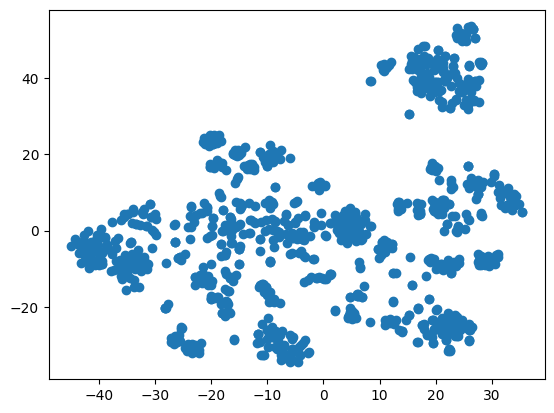

In [48]:
# Visualiser les embeddings t-SNE
plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1])
plt.show()

In [49]:
from sklearn.metrics import adjusted_rand_score

# Clustering avec k-means
kmeans = KMeans(n_clusters=7, random_state=0, n_init='auto').fit(tsne_embeddings)

# On suppose que "y_true" est un vecteur contenant les labels réels et "y_pred" les labels prédits par votre modèle de clustering KMeans
y_true = df_bert['product_category'].values
y_pred = kmeans.predict(tsne_embeddings)

# Calcul de l'ARI
ari = adjusted_rand_score(y_true, y_pred)

# Affichage de l'ARI
print("ARI:", ari)

ARI: 0.6315954451371194


In [51]:
# Création d'une nouvelle colonne "product_category" dans le DataFrame
df_bert['product_category'] = df_bert['product_category_tree'].apply(lambda x: x.split('>>')[0].strip())

# Affichage des 7 catégories différentes
df_bert['product_category'].unique()


array(['["Home Furnishing', '["Baby Care', '["Watches',
       '["Home Decor & Festive Needs', '["Kitchen & Dining',
       '["Beauty and Personal Care', '["Computers'], dtype=object)

In [53]:


df_bert['product_category'] = df_bert['product_category'].str.replace('\[', '', regex=True).str.replace('"', '', regex=True)

df_bert['product_category'].value_counts()


product_category
Home Furnishing               150
Baby Care                     150
Watches                       150
Home Decor & Festive Needs    150
Kitchen & Dining              150
Beauty and Personal Care      150
Computers                     150
Name: count, dtype: int64

In [41]:
from PIL import Image

# Charger l'image
img = Image.open("Images/00cbbc837d340fa163d11e169fbdb952.jpg") 

# Afficher l'image chargée
img.show()

In [42]:
# Récupérer et afficher la taille de l'image (en pixels)
w, h = img.size
print("Largeur : {} px, hauteur : {} px".format(w, h))

Largeur : 1347 px, hauteur : 326 px


In [43]:
# Afficher son mode de quantification
print("Format des pixels : {}".format(img.mode))

# Récupérer et afficher la valeur du pixel à une position précise
px_value = img.getpixel((20,100))
print("Valeur du pixel situé en (20,100) : {}".format(px_value))

Format des pixels : RGB
Valeur du pixel situé en (20,100) : (175, 146, 116)


In [44]:
import numpy as np

# Récupérer les valeurs de tous les pixels sous forme d'une matrice
mat = np.array(img)
mat

# Afficher la taille de la matrice de pixels
print("Taille de la matrice de pixels : {}".format(mat.shape))

Taille de la matrice de pixels : (326, 1347, 3)


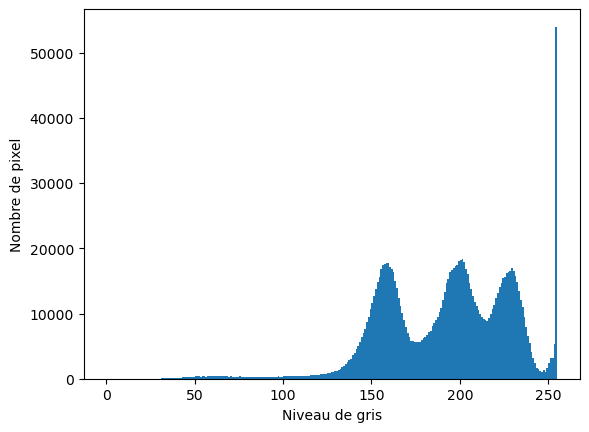

In [45]:

# Charger l'image comme matrice de pixels
img = np.array(Image.open("Images/00cbbc837d340fa163d11e169fbdb952.jpg"))

# Générer et afficher l'histogramme
# Pour le normaliser : argument density=True dans plt.hist
# Pour avoir l'histogramme cumulé : argument cumulative=True
plt.xlabel("Niveau de gris")
plt.ylabel("Nombre de pixel")
n, bins, patches = plt.hist(img.flatten(), bins=range(256))
plt.show()

In [8]:
#Faire étape par etape du prepross
import os
from PIL import Image, ImageOps, ImageFilter

# Chemin vers le dossier contenant les images originales
input_path = "Images/"

# Chemin vers le dossier de sortie pour les images modifiées
output_path = "imageModif/"

# Créer le dossier de sortie s'il n'existe pas déjà
if not os.path.exists(output_path):
    os.mkdir(output_path)

# Parcourir tous les fichiers du dossier d'entrée
for filename in os.listdir(input_path):
    if filename.endswith(".jpg"):
        # Ouvrir l'image et appliquer les traitements
        with Image.open(os.path.join(input_path, filename)) as img:
            img = img.convert('L')  # Noir & Blanc
            img = ImageOps.equalize(img)  # Égalisateur histogramme
            img = img.filter(ImageFilter.GaussianBlur(radius=2))  # Filtre gaussien

            # Sauvegarder l'image modifiée dans le dossier de sortie
            output_file = os.path.join(output_path, filename)
            img.save(output_file)


In [54]:
from PIL import Image, ImageOps, ImageFilter
# Charger l'image
img = Image.open("Images/c4ac93e194281d6d1450ffdaa52f5f99.jpg")

# Convertir l'image en noir et blanc
img = img.convert('L')

# Appliquer l'égalisation de l'histogramme
img = ImageOps.equalize(img)

# Enregistrer l'image résultante en noir et blanc
img.show()


In [56]:


# Charger l'image en noir et blanc
img = Image.open("Images/c4ac93e194281d6d1450ffdaa52f5f99.jpg")

# Appliquer un filtre gaussien
img = img.filter(ImageFilter.GaussianBlur(radius=2))

# Enregistrer l'image résultante après le filtre gaussien
img.show()



In [58]:


# Charger l'image en noir et blanc
img = Image.open("Images/c4ac93e194281d6d1450ffdaa52f5f99.jpg")

# Appliquer un filtre gaussien
img = ImageOps.equalize(img)

# Enregistrer l'image résultante après le filtre gaussien
img.show()



In [2]:
# Chemin vers le dossier contenant les images modifiées
input_path = "imageModif/"

# Créer une liste pour stocker les descripteurs de toutes les images
descriptors_list = []

# Parcourir tous les fichiers du dossier d'entrée
for filename in os.listdir(input_path):
    if filename.endswith(".jpg"):
        # Construire le chemin complet de l'image
        img_path = os.path.join(input_path, filename)
        
        # Lire l'image
        img = cv2.imread(img_path)
        
        # Extraire les descripteurs SIFT
        sift = cv2.SIFT_create()
        keypoints, descriptors = sift.detectAndCompute(img, None)
        
         #Vérifier que le tableau de descripteurs n'est pas vide
        if descriptors is not None and len(descriptors) > 0:
            # Stocker les descripteurs dans la liste
            descriptors_list.append(descriptors)

# Convertir la liste de descripteurs en un tableau numpy
descriptors_array = np.vstack(descriptors_list).astype('double')

# Supprimer les valeurs NaN
#descriptors_array = descriptors_array[~np.isnan(descriptors_array).any(axis=1)]



## Approche sift

In [10]:
import cv2
import os
import numpy as np

In [11]:


# Chemin vers le dossier contenant les images modifiées
input_path = "imageModif/"

# Liste pour stocker les descripteurs et les noms de fichiers d'image
descriptors_list = []
image_filenames = []

# Initialiser le détecteur SIFT
sift = cv2.SIFT_create()

# Parcourir tous les fichiers du dossier d'entrée
for filename in os.listdir(input_path):
    if filename.endswith(".jpg"):
        # Construire le chemin complet de l'image
        img_path = os.path.join(input_path, filename)
        
        # Lire l'image
        img = cv2.imread(img_path)
        
        # Extraire les descripteurs SIFT
        keypoints, descriptors = sift.detectAndCompute(img, None)
        
        # Vérifier que le tableau de descripteurs n'est pas vide
        if descriptors is not None and len(descriptors) > 0:
            # Stocker les descripteurs et les noms de fichiers d'image
            descriptors_list.append(descriptors)
            image_filenames.append(filename)

# Convertir la liste de descripteurs en un tableau numpy
descriptors_array = np.concatenate(descriptors_list).astype('float32')



In [ ]:
kmeans = KMeans(n_clusters=100, random_state=0, n_init='auto').fit(descriptors_array)

In [88]:
# Initialiser une liste pour stocker les vecteurs de caractéristiques de chaque image
features_image = []

# Parcourir chaque image avec ses descripteurs correspondants ,la fonction zip pour parcourir deux listes simultanément
for descriptors, filename in zip(descriptors_list, image_filenames):
    # Obtenir les labels K-means correspondant aux descripteurs de l'image
    k_image_labels = kmeans.predict(descriptors.astype('float32'))

    # Compter les occurrences de chaque label et calculer l'histogramme des labels de l'image
    image_range, _ = np.histogram(k_image_labels, bins=range(101))
    
    # Ajouter le vecteur "features" à la liste avec le nom du fichier d'image
    features_image.append((filename, image_range))

# Convertir la liste de tuples en un tableau numpy
vector_images = np.array([features for _, features in features_image])


In [122]:
descriptors.shape

(469, 128)

In [119]:
print(vector_images.shape)
print(len(features_image))


(1050, 100)
1050


In [120]:
vector_images[0]

array([23,  4,  4, 27, 12, 33,  5, 13,  2, 12, 73, 31,  8,  0,  6, 16, 14,
       11, 14,  6, 30, 10,  3, 21, 10, 19, 11,  9, 38,  9, 10,  3, 36, 18,
        8,  0,  1, 17,  2, 30,  6,  1, 76,  0, 25, 37,  1,  8,  0, 18, 30,
        8, 23, 11, 13, 10, 20, 13, 10,  6,  3, 19, 28, 53,  6,  9, 91, 16,
       16, 85,  3,  7, 24, 12,  6, 42,  5, 39,  1,  9,  7, 18, 10, 32, 14,
       24,  4, 22, 11, 13,  4, 17,  7,  6, 10, 26, 36, 19,  7,  6],
      dtype=int64)

In [121]:
vector_images[1]

array([ 3, 41,  0,  2,  0,  0,  0,  2,  6,  2,  1,  0,  3,  7,  1,  1, 27,
       27,  3,  2,  2,  2, 13,  1,  0,  2,  0,  3,  0,  4,  1,  6,  0,  3,
        0,  5,  3,  1, 19,  0, 10,  4,  0,  6,  0,  2,  3,  0,  3,  0,  0,
        0,  0,  0,  1,  0,  0,  1,  1,  5,  1,  3,  1,  0,  0,  0,  0,  0,
        1,  0,  4, 19,  8,  1,  2,  2,  1,  1,  2,  5,  5,  0,  0,  1,  1,
        2,  2,  2,  3,  1,  0,  4,  4,  0,  3,  0,  0,  2,  2,  3],
      dtype=int64)

In [90]:
image_range.shape

(100,)

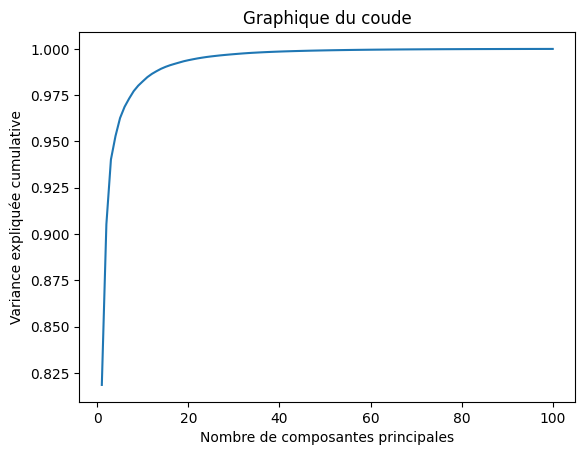

In [91]:
# Initialiser l'objet PCA sans spécifier le nombre de composantes
pca = PCA()

# Effectuer l'ACP sur les caractéristiques normalisées
pca.fit(vector_images)

# Tracer le graphique du coude (elbow plot)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance expliquée cumulative')
plt.title('Graphique du coude')
plt.show()


In [123]:
from sklearn.metrics import adjusted_rand_score
# Appliquer l'ACP sur les vecteurs de caractéristiques
pca = PCA()
features_pca = pca.fit_transform(vector_images)
# Appliquer le t-SNE sur les vecteurs de caractéristiques réduits par l'ACP
tsne = TSNE(n_components=2)
features_tsne = tsne.fit_transform(features_pca)



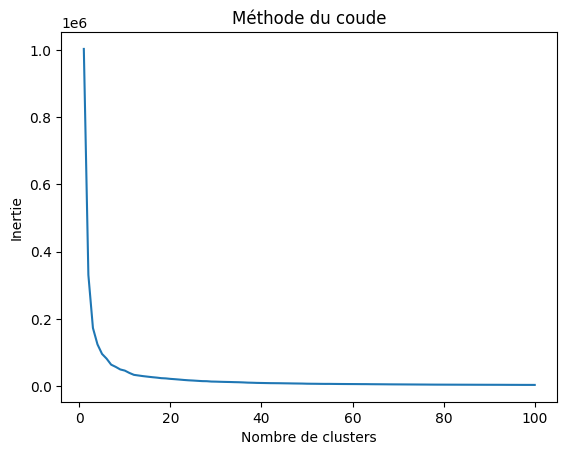

In [93]:
# Liste pour stocker les valeurs de l'inertie
inertia = []

# Nombre maximum de clusters à tester
max_clusters = 100

for k in range(1, max_clusters + 1):
    # Créer un modèle K-means avec le nombre de clusters actuel
    kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
    
    # Ajuster le modèle aux caractéristiques réduites
    kmeans.fit(features_tsne)
    
    # Ajouter l'inertie (somme des distances au carré des échantillons par rapport au centre) à la liste
    inertia.append(kmeans.inertia_)

# Tracer le graphique du coude (elbow plot)
plt.plot(range(1, max_clusters + 1), inertia)
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude')
plt.show()

In [94]:
kmeans_features = KMeans(n_clusters=7, random_state=0, n_init='auto').fit(features_tsne)

# On suppose que "y_true" est un vecteur contenant les labels réels et "y_pred" les labels prédits par votre modèle de clustering KMeans
y_true = df['product_category'].values
y_pred = kmeans_features.labels_

# Calcul de l'ARI
ari_score = adjusted_rand_score(y_true, y_pred)

# Affichage de l'ARI
print("ARI:", ari_score)

ARI: -0.00048088804834376384


## CNN

In [47]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
import os

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model = Model(inputs=base_model.inputs, outputs=base_model.layers[-1].output)

def extract_features(img_path, model):
    img = load_img(img_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = preprocess_input(img_array)
    img_array = np.expand_dims(img_array, axis=0)
    features = model.predict(img_array)
    features = np.reshape(features, (features.shape[0], -1))
    return features

input_path = "Images/"
features_list = []
image_filenames = []
for filename in os.listdir(input_path):
    if filename.endswith(".jpg"):
        img_path = os.path.join(input_path, filename)
        features = extract_features(img_path, model)
        features_list.append(features)
        image_filenames.append(filename)

features_matrix_mobilenetv2 = np.vstack(features_list)

print(features_matrix_mobilenetv2.shape)


1/1 [==============================] - 0s 56ms/step


1/1 [==============================] - 0s 53ms/step


C:\Users\Sylvain\anaconda3\envs\classification\Lib\site-packages\PIL\Image.py:3176: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


1/1 [==============================] - 0s 107ms/step


1/1 [==============================] - 0s 61ms/step


1/1 [==============================] - 0s 61ms/step
(1050, 62720)


In [29]:
from keras.applications import VGG16
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.models import Model


In [40]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model = Model(inputs=base_model.inputs, outputs=base_model.layers[-2].output)


In [42]:
def extract_features(img_path, model):
    img = load_img(img_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = preprocess_input(img_array)
    img_array = np.expand_dims(img_array, axis=0)
    features = model.predict(img_array)
    features = np.reshape(features, (features.shape[0], -1))
    return features

In [43]:
input_path = "Images/"
features_list = []
image_filenames = []
for filename in os.listdir(input_path):
    if filename.endswith(".jpg"):
        img_path = os.path.join(input_path, filename)
        features = extract_features(img_path, model)
        features_list.append(features)
        image_filenames.append(filename)

features_matrix_vgg16 = np.vstack(features_list)

1/1 [==============================] - 0s 153ms/step


1/1 [==============================] - 0s 145ms/step


C:\Users\Sylvain\anaconda3\envs\classification\Lib\site-packages\PIL\Image.py:3176: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


1/1 [==============================] - 0s 194ms/step


1/1 [==============================] - 0s 192ms/step


1/1 [==============================] - 0s 137ms/step


In [45]:
features_matrix_vgg16.shape

(1050, 100352)

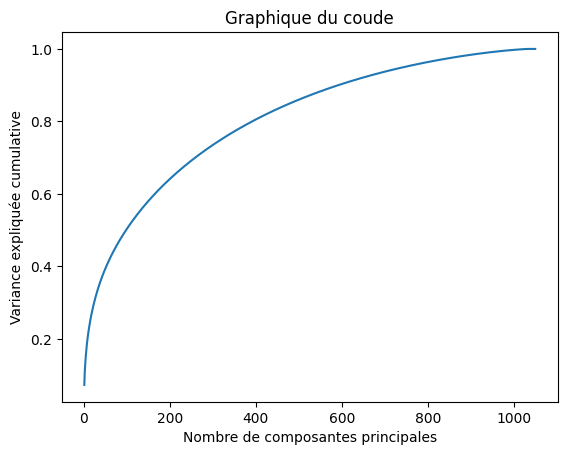

In [100]:

# Initialiser l'objet PCA sans spécifier le nombre de composantes
pca = PCA()

# Effectuer l'ACP sur les caractéristiques normalisées
pca.fit(features_matrix_vgg16)

# Tracer le graphique du coude (elbow plot)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance expliquée cumulative')
plt.title('Graphique du coude')
plt.show()


In [50]:
# Appliquer l'ACP sur les vecteurs de caractéristiques
pca = PCA()
features_pca = pca.fit_transform(features_matrix_mobilenetv2)

In [51]:
features_pca.shape

(1050, 1050)

In [52]:
# Appliquer le t-SNE sur les vecteurs de caractéristiques réduits par l'ACP
tsne = TSNE(n_components=2)
features_tsne = tsne.fit_transform(features_pca)


In [53]:
features_tsne

array([[  0.3375419,  29.367893 ],
       [ -0.6673794,   9.673618 ],
       [  8.969385 ,  -0.9556268],
       ...,
       [-26.462238 , -13.369521 ],
       [ 19.96971  ,  13.195665 ],
       [  2.84844  ,   9.175189 ]], dtype=float32)

In [54]:
from sklearn.metrics import adjusted_rand_score
kmeans_vgg16 = KMeans(n_clusters=7, random_state=0, n_init='auto').fit(features_tsne)

# On suppose que "y_true" est un vecteur contenant les labels réels et "y_pred" les labels prédits par votre modèle de clustering KMeans
y_true = df['product_category'].values
y_pred = kmeans_vgg16.predict(features_tsne)

# Calcul de l'ARI
ari_score = adjusted_rand_score(df['product_category'],y_pred )


# Affichage de l'ARI
print("ARI:", ari_score)

ARI: -0.0017866260344669945


## Classification supervisée

In [1]:
from keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.models import Model ,Sequential
from keras.layers import GlobalAveragePooling2D, Dense, Dropout
import numpy as np
import os
from sklearn.metrics import adjusted_rand_score

# Charger le modèle pré-entraîné VGG16 sans la couche supérieure
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Ajouter des couches supplémentaires au modèle
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(7, activation='softmax')(x)  # Remplacer "num_classes" par le nombre de classes de votre classification

# Créer le modèle final
#model = Model(inputs=base_model.input, outputs=predictions)
# Définir le nouveau modèle
model = Model(inputs=base_model.input, outputs=predictions)
# compilation du modèle 
model.compile(loss="categorical_crossentropy", optimizer='rmsprop', metrics=["accuracy"])

print(model.summary())



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [112]:
# Chemin vers le dossier contenant les images prétraitées
input_path = "Images/"

# Listes pour stocker les prédictions et les étiquettes réelles
predictions_list = []
labels_list = []

# Prétraiter et prédire pour chaque image prétraitée
for filename in os.listdir(input_path):
    if filename.endswith(".jpg"):
        # Charger l'image prétraitée
        img_path = os.path.join(input_path, filename)
        img = load_img(img_path, target_size=(224, 224))
        x = img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        # Obtenir les prédictions de classification
        predictions = model.predict(x)
        # Ajouter les prédictions à la liste
        predictions_list.append(predictions)

        # Ajouter l'étiquette réelle à la liste
        label = df['product_category'].values[0] 
        labels_list.append(label)

# Convertir les listes en tableaux numpy pour les calculs
predictions_array = np.concatenate(predictions_list)
labels_array = np.array(labels_list)

# Afficher la shape finale
print("Shape des prédictions :", predictions_array.shape)
print("Shape des étiquettes réelles :", labels_array.shape)


1/1 [==============================] - 0s 148ms/step


1/1 [==============================] - 0s 176ms/step


C:\Users\Sylvain\anaconda3\envs\classification\Lib\site-packages\PIL\Image.py:3176: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


1/1 [==============================] - 0s 151ms/step


1/1 [==============================] - 0s 151ms/step


1/1 [==============================] - 0s 155ms/step
Shape des prédictions : (1050, 1050)
Shape des étiquettes réelles : (1050,)


In [33]:
# Afficher la shape finale
print("Shape des prédictions :", predictions_array.shape)
print("Shape des étiquettes réelles :", labels_array.shape)

NameError: name 'predictions_array' is not defined

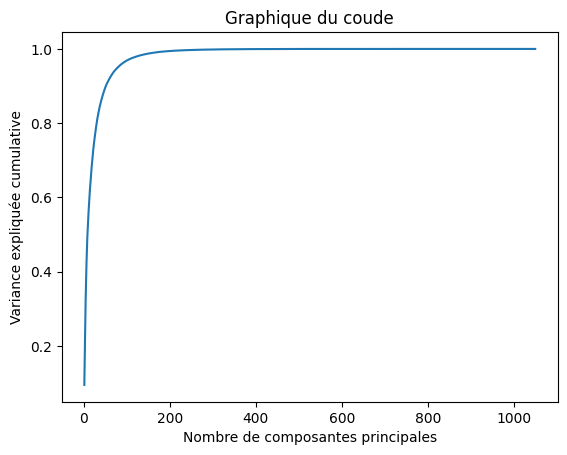

In [114]:
# Initialiser l'objet PCA sans spécifier le nombre de composantes
pca = PCA()

# Effectuer l'ACP sur les caractéristiques normalisées
pca.fit(predictions_array)

# Tracer le graphique du coude (elbow plot)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance expliquée cumulative')
plt.title('Graphique du coude')
plt.show()


In [117]:
# Réaliser une ACP (Analyse en Composantes Principales)
pca = PCA()
pca_result = pca.fit_transform(predictions_array)

# Réaliser une t-SNE (t-distributed Stochastic Neighbor Embedding)
tsne = TSNE(n_components=2, random_state=0)
tsne_result = tsne.fit_transform(predictions_array)

# Exécuter l'algorithme de clustering K-means
kmeans = KMeans(n_clusters=7, random_state=0,n_init='auto').fit(predictions_array)



In [118]:
y_true = df['product_category'].values
#y_true = labels_array
y_pred = kmeans.predict(predictions_array)

# Calcul du score ARI
ari_score = adjusted_rand_score(y_true, y_pred)


print("Score ARI :", ari_score)

Score ARI : -0.00037280487003442365


## Supervisée


In [64]:
def create_model_fct():
    # Récupération modèle pré-entraîné
    model0 = VGG16(include_top=False, weights="imagenet", input_shape=(224, 224, 3))

    # Layers non entraînables = on garde les poids du modèle pré-entraîné
    for layer in model0.layers:
        layer.trainable = False

    # Récupérer la sortie de ce réseau
    x = model0.output

    # Compléter le modèle
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(7, activation='softmax')(x)

    # Définir le nouveau modèle
    model = Model(inputs=model0.input, outputs=predictions)
    model.compile(loss="categorical_crossentropy", optimizer='rmsprop', metrics=["accuracy"])

    print(model.summary())

    return model


In [65]:
def image_prep_fct(image_filenames):
    prepared_images = []
    for image_filename in image_filenames:
        img_path = os.path.join("Images", image_filename)
        img = load_img(img_path, target_size=(224, 224))
        img = img_to_array(img)
        img = img.reshape((img.shape[0], img.shape[1], img.shape[2]))
        img = preprocess_input(img)
        prepared_images.append(img)
    prepared_images_np = np.array(prepared_images)
    return prepared_images_np

In [66]:
# Préparation des images
images_np = image_prep_fct(image_filenames)
print(images_np.shape)


C:\Users\Sylvain\anaconda3\envs\classification\Lib\site-packages\PIL\Image.py:3176: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


(1050, 224, 224, 3)


In [72]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
# Encoder les étiquettes
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(df['product_category'])

# Préparation des étiquettes
X = images_np
y = to_categorical(encoded_labels, num_classes=7)

print(y.shape)
print(X.shape)


(1050, 7)
(1050, 224, 224, 3)


In [73]:
y

array([[0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [74]:
from sklearn.model_selection import train_test_split

# Division des données en ensemble d'entraînement et ensemble de validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Affichage des dimensions des ensembles d'entraînement et de validation
print("Dimensions de l'ensemble d'entraînement : ", X_train.shape, y_train.shape)
print("Dimensions de l'ensemble de validation : ", X_val.shape, y_val.shape)


Dimensions de l'ensemble d'entraînement :  (840, 224, 224, 3) (840, 7)
Dimensions de l'ensemble de validation :  (210, 224, 224, 3) (210, 7)


In [75]:
print("Dimensions de X_val : ", X_val.shape)
print("Dimensions de y_val : ", y_val.shape)


Dimensions de X_val :  (210, 224, 224, 3)
Dimensions de y_val :  (210, 7)


In [76]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

#Création du modèle
with tf.device('/gpu:0'):
    model1 = create_model_fct()

# Création du callback
model1_save_path1 = "./model1_best_weights.h5"
checkpoint = ModelCheckpoint(model1_save_path1, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
callbacks_list = [checkpoint, es]

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [77]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [25]:
history1 = model1.fit(X_train, y_train, epochs=50, batch_size=64, callbacks=callbacks_list,
                      validation_data=(X_val, y_val), verbose=1)


Epoch 1/50
14/14 [==============================] - ETA: 0s - loss: 9.8536 - accuracy: 0.1464
Epoch 1: val_loss improved from inf to 4.93301, saving model to .\model1_best_weights.h5
14/14 [==============================] - 108s 8s/step - loss: 9.8536 - accuracy: 0.1464 - val_loss: 4.9330 - val_accuracy: 0.1429
Epoch 2/50
14/14 [==============================] - ETA: 0s - loss: 5.0759 - accuracy: 0.1893
Epoch 2: val_loss improved from 4.93301 to 3.30081, saving model to .\model1_best_weights.h5
14/14 [==============================] - 111s 8s/step - loss: 5.0759 - accuracy: 0.1893 - val_loss: 3.3008 - val_accuracy: 0.1286
Epoch 3/50
14/14 [==============================] - ETA: 0s - loss: 3.2411 - accuracy: 0.2393
Epoch 3: val_loss improved from 3.30081 to 2.87148, saving model to .\model1_best_weights.h5
14/14 [==============================] - 117s 9s/step - loss: 3.2411 - accuracy: 0.2393 - val_loss: 2.8715 - val_accuracy: 0.1333
Epoch 4/50
14/14 [==============================] - E

In [118]:
# Score du dernier epoch

loss, accuracy = model1.evaluate(X_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
print()
loss, accuracy = model1.evaluate(X_val, y_val, verbose=True)
print("Validation Accuracy:  {:.4f}".format(accuracy))

27/27 [==============================] - 96s 4s/step - loss: 0.9354 - accuracy: 0.7619
Training Accuracy: 0.7619

7/7 [==============================] - 23s 3s/step - loss: 2.6578 - accuracy: 0.1429
Validation Accuracy:  0.1429


In [119]:
# Score de l'epoch optimal

model1.load_weights(model1_save_path1)

loss, accuracy = model1.evaluate(X_val, y_val, verbose=False)
print("Validation Accuracy :  {:.4f}".format(accuracy))



Validation Accuracy :  0.1333


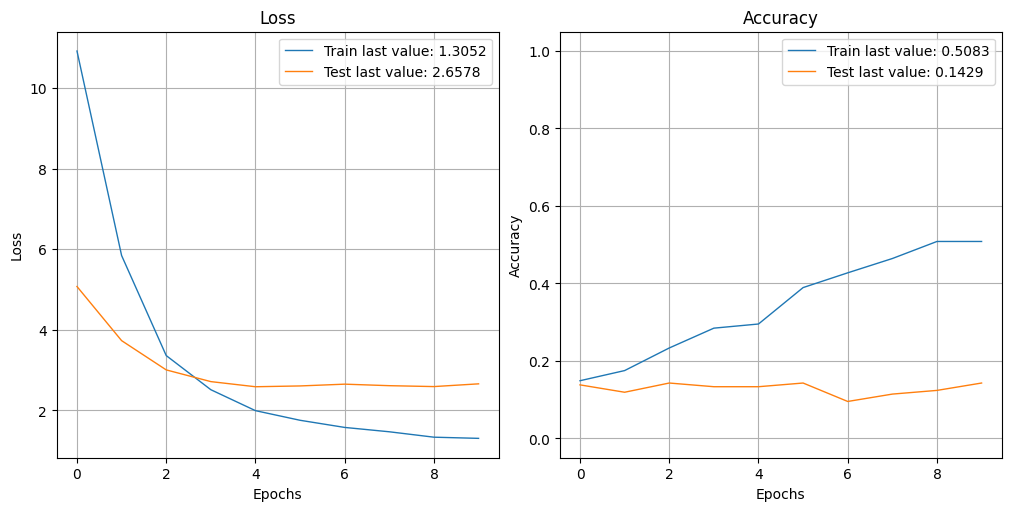

In [120]:
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt

show_history(history1)
plot_history(history1, path="standard.png")
plt.close()

In [31]:
y_val_num = np.argmax(y_val, axis=1)
y_val_pred = np.argmax(model1.predict(X_val), axis=1)
y_val_num = np.argmax(y_val, axis=1)
print(y_val_num)
print()
print(y_val_pred)

7/7 [==============================] - 26s 4s/step
[2 5 2 1 6 0 3 2 4 4 6 0 5 1 2 2 0 2 4 4 5 2 0 2 6 1 3 5 1 5 5 2 2 6 3 4 6
 3 3 2 4 1 5 4 1 5 5 2 0 4 5 3 5 4 2 0 1 5 2 4 4 0 6 5 6 4 0 3 4 6 0 2 2 2
 6 2 4 3 2 4 4 4 2 5 2 6 4 3 3 3 4 4 5 3 6 2 0 6 3 0 4 6 3 4 2 6 1 5 4 2 5
 4 4 0 0 0 2 6 6 2 2 2 3 4 5 3 1 3 0 0 5 1 0 3 0 5 3 1 5 2 5 0 3 4 4 6 6 1
 3 1 6 1 6 3 2 4 6 1 3 6 6 6 0 2 3 6 6 2 6 2 6 1 4 6 0 6 3 3 4 3 0 5 4 3 0
 1 0 6 2 4 1 6 5 4 5 2 1 5 2 2 1 0 4 2 1 3 6 0 0 3]

[3 2 1 5 5 1 1 4 0 3 0 0 6 1 2 5 4 1 3 2 3 3 4 3 3 0 3 0 4 6 3 0 6 0 0 4 1
 4 4 1 1 3 1 0 2 2 2 3 0 5 4 6 1 4 5 0 6 2 5 5 0 0 1 2 0 1 6 6 0 5 0 1 5 5
 2 0 1 1 2 5 4 6 2 1 4 0 0 1 6 2 6 1 0 2 0 6 5 2 0 3 6 0 6 0 1 5 2 3 2 1 1
 6 3 6 4 4 1 5 1 2 4 6 3 5 6 2 1 5 3 0 5 0 3 3 0 3 0 2 6 0 0 2 1 5 0 6 6 0
 3 1 0 3 1 0 3 3 5 2 0 4 1 0 5 3 3 5 5 0 3 6 5 5 6 4 3 0 0 4 1 0 1 4 3 5 5
 0 0 2 5 3 6 4 5 0 6 5 2 0 3 4 5 5 1 0 6 1 0 0 3 3]


In [33]:
from sklearn import cluster, metrics


In [34]:
conf_mat = metrics.confusion_matrix(y_val_num, y_val_pred)
print(conf_mat)

[[ 9  2  1  5  4  4  2]
 [ 4  3  5  2  1  3  3]
 [ 5  7  4  7  4  7  4]
 [ 7  5  3  6  3  2  4]
 [ 8  6  2  6  3  5  5]
 [ 4  4  5  4  2  2  5]
 [10  5  3  2  3  8  2]]


In [36]:
def conf_mat_transform(y_true,y_pred) :
    conf_mat = metrics.confusion_matrix(y_true,y_pred)
    
    corresp = np.argmax(conf_mat, axis=0)
    print ("Correspondance des clusters : ", corresp)
    # y_pred_transform = np.apply_along_axis(correspond_fct, 1, y_pred)
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x]) 
    
    return labels['y_pred_transform']

In [37]:
y_val_pred_transform = conf_mat_transform(y_val_num, y_val_pred)
conf_mat = metrics.confusion_matrix(y_val_num, y_val_pred_transform)
print(conf_mat)
print()
print(metrics.classification_report(y_val_num, y_val_pred_transform))

Correspondance des clusters :  [6 2 1 2 0 6 4]
[[ 4  1  7  0  2  0 13]
 [ 1  5  5  0  3  0  7]
 [ 4  4 14  0  4  0 12]
 [ 3  3 11  0  4  0  9]
 [ 3  2 12  0  5  0 13]
 [ 2  5  8  0  5  0  6]
 [ 3  3  7  0  2  0 18]]

              precision    recall  f1-score   support

           0       0.20      0.15      0.17        27
           1       0.22      0.24      0.23        21
           2       0.22      0.37      0.27        38
           3       0.00      0.00      0.00        30
           4       0.20      0.14      0.17        35
           5       0.00      0.00      0.00        26
           6       0.23      0.55      0.32        33

    accuracy                           0.22       210
   macro avg       0.15      0.21      0.17       210
weighted avg       0.16      0.22      0.17       210



C:\Users\Sylvain\anaconda3\envs\classification\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sylvain\anaconda3\envs\classification\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sylvain\anaconda3\envs\classification\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

## Approche avec data augmentation

In [79]:

# Création d'une instance de ImageDataGenerator avec les transformations souhaitées
datagen = ImageDataGenerator(
 
        RandomFlip("horizontal", input_shape=(224, 224, 3)),
        RandomRotation(0.1),
        RandomZoom(0.1),
        # Rescaling(1./127.5, offset=-1.0)
   
)

# Ajustement des données d'entraînement
datagen.fit(X_train)


In [80]:
def create_model_fct2():
    # Récupération modèle pré-entraîné
    model_base = VGG16(include_top=False, weights="imagenet", input_shape=(224, 224, 3))
    for layer in model_base.layers:
        layer.trainable = False

    # Définition du nouveau modèle
    model_input = Input(shape=(224, 224, 3))
    x = Rescaling(1./127.5, offset=-1)(model_input)
    x = model_base(x)
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(7, activation='softmax')(x)
    model = Model(inputs=model_input, outputs=predictions)

    # Compilation du modèle
    model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])

    return model


In [81]:
from tensorflow.keras.layers import Input

with tf.device('/gpu:0'):
    model4 = create_model_fct2()
    model4.build((None, 224, 224, 3))  # Construire le modèle en spécifiant la taille d'entrée
    print(model4.summary())

# Création du callback
model4_save_path = "./model4_best_weights.h5"
checkpoint = ModelCheckpoint(model4_save_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
callbacks_list = [checkpoint, es]


Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_4   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_8 (Dense)             (None, 256)               131328    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                           

In [82]:
# Entraînement du modèle en utilisant les données augmentées
history2 = model4.fit(datagen.flow(X_train, y_train, batch_size=64),
                      steps_per_epoch=len(X_train) // 64,  # Nombre d'itérations par époque
                      epochs=50,
                      callbacks=callbacks_list,
                      validation_data=(X_val, y_val),
                      verbose=1)

Epoch 1/50
13/13 [==============================] - ETA: 0s - loss: 2.1169 - accuracy: 0.1443 
Epoch 1: val_loss improved from inf to 1.96794, saving model to .\model4_best_weights.h5
13/13 [==============================] - 235s 18s/step - loss: 2.1169 - accuracy: 0.1443 - val_loss: 1.9679 - val_accuracy: 0.1000
Epoch 2/50
13/13 [==============================] - ETA: 0s - loss: 2.0225 - accuracy: 0.1495 
Epoch 2: val_loss did not improve from 1.96794
13/13 [==============================] - 263s 20s/step - loss: 2.0225 - accuracy: 0.1495 - val_loss: 1.9785 - val_accuracy: 0.1429
Epoch 3/50
13/13 [==============================] - ETA: 0s - loss: 1.9894 - accuracy: 0.1611 
Epoch 3: val_loss improved from 1.96794 to 1.95811, saving model to .\model4_best_weights.h5
13/13 [==============================] - 244s 19s/step - loss: 1.9894 - accuracy: 0.1611 - val_loss: 1.9581 - val_accuracy: 0.1238
Epoch 4/50
13/13 [==============================] - ETA: 0s - loss: 1.9877 - accuracy: 0.1353

KeyboardInterrupt: 

In [85]:
# Score du dernier epoch
loss, accuracy = model1.evaluate(X_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
print()
loss, accuracy = model1.evaluate(X_val, y_val, verbose=True)
print("Validation Accuracy:  {:.4f}".format(accuracy))

27/27 [==============================] - 101s 4s/step - loss: 1.0110 - accuracy: 0.6988
Training Accuracy: 0.6988

7/7 [==============================] - 25s 4s/step - loss: 2.4975 - accuracy: 0.1143
Validation Accuracy:  0.1143


In [ ]:
model1.load_weights(model1_save_path)

loss, accuracy = model1.evaluate(X_val, y_val, verbose=False)
print("Validation Accuracy:  {:.4f}".format(accuracy))

loss, accuracy = model1.evaluate(X_test, y_test, verbose=False)
print("Test Accuracy:  {:.4f}".format(accuracy))

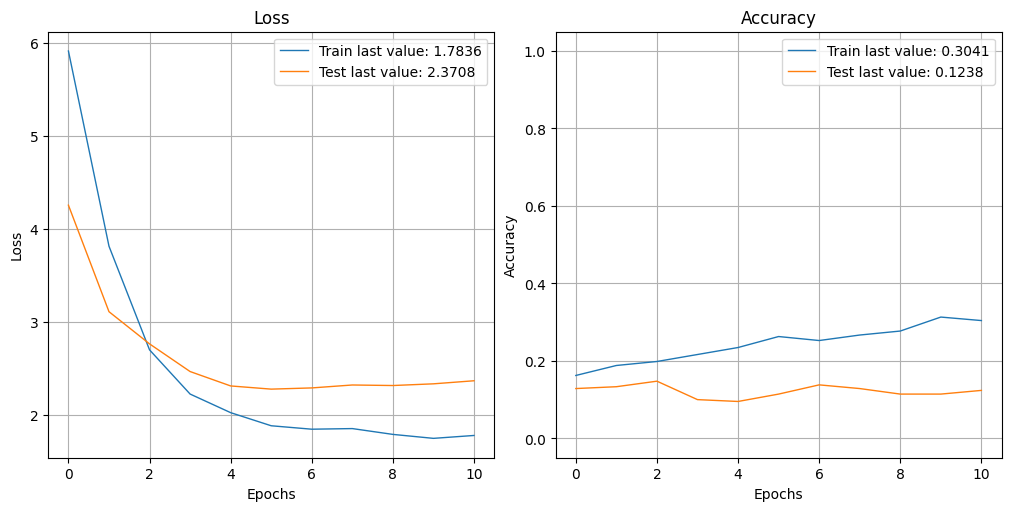

In [107]:
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt

show_history(history2)
plot_history(history2, path="standard.png")
plt.close()

## autre sans créer un autre model

In [146]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Création d'une instance de ImageDataGenerator avec les transformations souhaitées
datagen = ImageDataGenerator(
     RandomFlip("horizontal", input_shape=(224, 224, 3)),
        RandomRotation(0.1),
        RandomZoom(0.1),
    width_shift_range=0.2,  # Décalage horizontal aléatoire entre -20% et 20% de la largeur
    height_shift_range=0.2,  # Décalage vertical aléatoire entre -20% et 20% de la hauteur
    horizontal_flip=True  # Retournement horizontal aléatoire
)

# Ajustement des données d'entraînement
datagen.fit(X_train)





In [147]:
# Entraînement du modèle en utilisant les données augmentées
history2 = model1.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    steps_per_epoch=len(X_train) // 64,  # Nombre d'itérations par époque
    epochs=50,
    callbacks=callbacks_list,
    validation_data=(X_val, y_val),
    verbose=1
)


Epoch 1/50
13/13 [==============================] - ETA: 0s - loss: 8.3002 - accuracy: 0.1482
Epoch 1: val_loss improved from inf to 5.06816, saving model to .\model1_best_weights.h5
13/13 [==============================] - 118s 9s/step - loss: 8.3002 - accuracy: 0.1482 - val_loss: 5.0682 - val_accuracy: 0.1190
Epoch 2/50
13/13 [==============================] - ETA: 0s - loss: 4.8510 - accuracy: 0.1572
Epoch 2: val_loss improved from 5.06816 to 3.64777, saving model to .\model1_best_weights.h5
13/13 [==============================] - 117s 9s/step - loss: 4.8510 - accuracy: 0.1572 - val_loss: 3.6478 - val_accuracy: 0.1381
Epoch 3/50
13/13 [==============================] - ETA: 0s - loss: 3.1845 - accuracy: 0.1843
Epoch 3: val_loss improved from 3.64777 to 3.02837, saving model to .\model1_best_weights.h5
13/13 [==============================] - 115s 9s/step - loss: 3.1845 - accuracy: 0.1843 - val_loss: 3.0284 - val_accuracy: 0.0952
Epoch 4/50
13/13 [==============================] - E

In [ ]:
# Score du dernier epoch
loss, accuracy = model1.evaluate(X_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
print()
loss, accuracy = model1.evaluate(X_val, y_val, verbose=True)
print("Validation Accuracy:  {:.4f}".format(accuracy))



In [ ]:
model1.load_weights(model1_save_path)

loss, accuracy = model1.evaluate(X_val, y_val, verbose=False)
print("Validation Accuracy:  {:.4f}".format(accuracy))

loss, accuracy = model1.evaluate(X_test, y_test, verbose=False)
print("Test Accuracy:  {:.4f}".format(accuracy))



In [ ]:
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt

show_history(history2)
plot_history(history2, path="standard.png")
plt.close()